# The matrix-element method<span STYLE="color:blue">$^1$</span>

The second method that we will implement is the __<span STYLE="color:red">matrix-element method</span>__.  This method exploits the fact that the time-independent Schrödinger Equation (TISE) is an eigenvalue equation, $\hat{H}|\psi\rangle = E|\psi\rangle$. Thus, when formulated numerically on a computer, the TISE can be solved efficiently with any modern computer algebra system (_e.g._ Mathematica or Matlab) or computer programmming language. Here we will use python's [NumPy package](https://numpy.org) to efficiently perform the matrix operations. 

<span STYLE="color:blue">$^1$This exercise is adapted from Daniel Schroeder's ["Notes on Quantum Mechanics"](http://physics.weber.edu/schroeder/quantum/QuantumBook.pdf), section 2.2.</span>

## Theoretical background

Our aim is to solve the the time-independent Schrödinger Equation,

$$ \hat{H}|\psi_n\rangle = E_n|\psi_n\rangle ,$$

for any arbitrary Hamiltonian $\hat{H}$. Let's begin by introducing a set of _orthonormal_ basis functions $\{|\phi_j\rangle\}$ that are __not__ the eigenfunctions of the given Hamiltonian, but that __satisfiy the same boundary conditions__ as the desired solutions.  In this case, we can expand the solutions to the TISE in terms of the basis functions as

$$ \quad\qquad |\psi_n\rangle = \sum_j c_n^j |\phi_j\rangle\,, \qquad(1)$$

such that the TISE becomes 

$$ \sum_j c_n^j \hat{H}|\phi_j\rangle = E_n \sum_j c_n^j|\phi_j\rangle .$$

Now let's take the inner product of the TISE with one of the basis functions, $\langle \phi_i|$:

$$ \sum_j c_n^j \langle \phi_i| \hat{H}|\phi_j\rangle = E_n \sum_j c_n^j \langle \phi_i|\phi_j\rangle .$$

Because we are using an orthonormal basis, the inner product $\langle\phi_i|\phi_j\rangle = \delta_{ij}$.  The quantity $\langle\phi_i| \hat{H}|\phi_j\rangle \equiv H_{ij} = H_{ji}^*$ is the __"ij" matrix element of the Hamiltonian operator between basis functions $i$ and $j$__.  Thus, the TISE becomes

$$ \sum_j H_{ij} c_n^j  = E_n \sum_j \delta_{ij} c_n^j .$$

Expressing this equation in matrix form, 


\begin{equation*}
    \qquad\qquad  \begin{bmatrix}
        H_{11} & H_{12} & H_{13} & \ldots  \\
        H_{21} & H_{22} & H_{23} & \ldots \\
        H_{31} & H_{32} & H_{33} & \ldots \\
        \vdots & \vdots & \vdots & \ddots 
    \end{bmatrix}
    \begin{bmatrix}
        c_n^1 \\
        c_n^2 \\
        c_n^3 \\
        \vdots 
    \end{bmatrix}
     = E_n
    \begin{bmatrix}
        c_n^1 \\
        c_n^2 \\
        c_n^3 \\
        \vdots 
    \end{bmatrix}
        \mathrm{,}  \qquad(2)
\end{equation*} 


we can see that it is an eigenvalue equation.  We will refer to Eq. (2) as the <span STYLE="color:blue"><b>"matrix-element equation."</b></span>   

The __eigenvalues__ of the matrix-element equation are the __energies__ of the stationary-state solutions to the TISE, and are _independent of the basis functions $\{|\phi_j\rangle\}$ used to calculate the matrix elements $H_{ij}$_. The <span STYLE="color:red">__eigenvectors__ of the matrix-element equation are the __coefficients__ of the corresponding wave functions in terms of the basis functions</span>, and will necessarily _depend upon the basis functions employed._  Given a consistent set of basis functions $\{|\phi_j\rangle\}$ and coefficients $\{c_n^j\}$, however, the wave functions calculated via Eq. (1) are basis independent.

## Algorithm

<div class="alert alert-info">
    We are now ready to write down the <b>matrix-element algorithm</b>.  To find the stationary-state solutions of a given Hamiltonian $\hat{H}$:

1. choose a set of basis functions $\{|\phi_j\rangle\}$ that satisfy the boundary conditions imposed by the potential, 
2. calculate the matrix elements $H_{ij} = \langle\phi_i| \hat{H}|\phi_j\rangle$ in this basis,
3. calculate the eigenvalues and eigenvectors of the Hamiltonian matrix via Eq. (2)
4. constuct the stationary-state wave functions from the coefficients (_i.e._, eigenvectors) and basis functions via Eq. (1)
</div>

## Numerical errors

Although the dimension of the linear vector space spanned by all normalizable wave functions (_i.e._, Hilbert space) is infinite, in practice <span STYLE="color:red">we must <b>truncate</b> the number of basis vectors</span> in the sum in Eq. (1) -- and hence the dimensions of the Hamiltonian matrix in Eq. (2) -- so that our calculation can be performed on a computer.

For $N$ basis vectors, since $\hat{H}$ is Hermitian, the number of independent matrix elements $H_{ij}$ is $N(N+1)/2$.  Each of these matrix elements $H_{ij}$ is given by an integral over all space, 

$$ H_{ij} = \int d^3x\, \phi^*_i\, \hat{H}\, \phi_j\,, $$

that can be evaulated numerically. The calculation of these matrix elements is typically the most time-consuming portion of the matrix-element computation.  

When using numerical methods, one must quantify any errors introduced from approximations, which are typically due to either discretizing a continuous variable or truncating an infinite series. With the matrix-element approach, we are introducing an error into our calculation by truncating the number of basis vectors.  For a given choice of basis, we can improve the accuracy of the resulting energies and wave functions by using a larger number of basis vector. Further, we can <span STYLE="color:red"><b>quantify the truncation error</b> in our calculation by varying the number of basis vectors</span> and observing by how much our results change. 



# Radial equation for spherically-symmetric potential

We will restrict ourselves in this exercise to time-independent Hamiltonians in three dimensions in which the potential only depends upon the distance from the origin, $V(\vec{r}) = V(r)$.  We will now use the spherical symmetry to make some simplifications. 

First, we know that the TISE in three dimensions separates into an angular equation and a radial equation.  The normalized solutions to the angular equation are the [spherical harmonics](https://en.wikipedia.org/wiki/Spherical_harmonics), $Y_l^m(\theta,\phi)$.  Because the solutions to the angular equation for a spherically-symmetric potential are universal, we need only solve the radial equation for whatever new potential we are given.  

The radial equation includes a term proportional to the squared orbital angular momentum operator that leads to an effective contribution to the potential that depends upon the angular-momentum quantum number $l$: 

$$ \quad- \frac{\hbar^2}{2m} \frac{d^2 u}{d r^2} +  \left[ \frac{\hbar^2}{2m} \frac{l(l+1)}{r^2} + V(r) \right] u(r) = E u(r)\,, \quad (3)$$

with $u(r) = rR(r)$.  Thus, the stationary-state solutions to the radial equation are specified by <span STYLE="color:blue">__two quantum numbers__: the principal quantum number $n$ and the angular-momentum quantum number $l$</span>:

$$ u_{nl}(r) = \sum_m {\color{blue}{c_{nl}^{\,j}}}\, \phi_j(r)\,,$$

where $\{\phi_j(r)\}$ is a set of basis functions that satisfy the boundary conditions imposed by $V(r)$.

<div class="alert alert-info"> Inspection of Eq.(3) shows that the matrix elements $H_{ij}$ can be broken into three contributions:  

- $- \frac{\displaystyle \hbar^2}{\displaystyle 2m} \langle \phi_i| \frac{\displaystyle d^2 }{\displaystyle d r^2} |\phi_j\rangle$, 

- $\frac{\displaystyle \hbar^2}{\displaystyle 2m}l(l+1) \langle \phi_i| \frac{\displaystyle 1}{\displaystyle r^2} |\phi_j\rangle$, and 

- $\langle \phi_i| V(r) |\phi_j\rangle$.

We will calculate each of these contributions separately in the following code.
</div>


# Numerical implementation

In the rest of the notebook, we will guide you through implementing the matrix-element method for the three-dimensional __infinite spherical well__ in Python, 

$$ 
V(r)=\left\{\begin{array}{ll}
0 & \quad  r < a,\\
\infty & \quad r \geq a. 
\end{array}
\right. 
$$

Although this potential can be solved exactly, it is useful when writing code to first test it on a simple scenario for which the answer is known, and to then test it with scenarios of increasing complexity.  

<div class="alert alert-warning">
    We will use <b>natural units</b> in our calculation, setting all of the quantities with dimensions ($a$, $m$, and $\hbar$) equal to 1.  With this choice, our units of energy are now $\frac{\displaystyle \hbar^2}{\displaystyle ma^2}$.  In other words, to convert the energies obtained in our simulation to SI units, we must multiply them by the quantity $\frac{\displaystyle \hbar^2}{\displaystyle ma^2}$.   The use of natural units will not only simplify our code, but it will also make our resuts more general.  This is because we can choose <i>any</i> values of of the particle mass $m$ and width of the well $a$ at a later date and re-interpret the results of our simulation using the appropriate conversion factor(s).   
</div>

## Preliminaries and function definitions

First import the modules [numpy](https://numpy.org) (_for matrix operations_); [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) (_to calculate the matrix elements and later normalize the wave functions_); and [matplotlib.pyplot](https://matplotlib.org) (_needed for plotting the wave functions_).

Also import the constants __math.pi__ and __math.inf__ for convience.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi as Pi
from math import inf as Inf

First define the __<span STYLE="color:red">potential function V(r)</span>__.   (_This isn't really necessary for the infinite spherical well -- which is constant throughout the integration region -- but will be needed for other potentials._)

In [2]:
global a, V0, b 
a=1     #size of well
b=4*a
V0=5  #depth of well

def Vr(r):
    if abs(r) < a:
        V = 0
    else: 
        V = V0
    return V

Next, choose a set of __<span STYLE="color:red">basis functions</span>__ for $u(r)$ that go to zero at $r=a$ and a number of basis vectors __Nb__.  We will use the solutions the 1D infinite square well, $\phi_j(r) = \sqrt{\frac{\displaystyle 2}{\displaystyle a}} \sin\left(\frac{\displaystyle j\pi r}{\displaystyle a}\right)$ (_these, of course, are the exact solutions for $l=0$_) and start with 10 basis vectors.

In [3]:
global Nb
Nb=30  #number of basis vectors

## Returns jth basis function at radius r (with respect to new bound b)
def Basis(j,r):
    return np.sqrt(2/b)*np.sin((j*Pi*r)/b)

## Matrix elements

Now we need to calculate the __<span STYLE="color:red">matrix elements $H_{jk}$</span>__.  (_Now that we are writing down explicit functions, we are changing the dummy basis indices to $j$ and $k$ so that they are not confused with the imaginary number $i$._)  

### Let's begin with $-\frac{\displaystyle \hbar^2}{\displaystyle 2m}\langle \phi_j| \frac{\displaystyle d^2 }{\displaystyle d r^2} |\phi_k\rangle$.  

We can perform the differentiation analytically:

$$ \frac{d^2}{dr^2} \sqrt{\frac{2}{a}} \sin\left(\frac{k\pi r}{a}\right) = - \sqrt{\frac{2}{a}} \left(\frac{k\pi}{a}\right)^2 \sin\left(\frac{k\pi r}{a}\right) \,.$$

Therefore, 

$$ \langle \phi_j| \frac{\displaystyle d^2 }{\displaystyle d r^2} |\phi_k\rangle = - \left(\frac{k\pi}{a}\right)^2 \int_0^a \sqrt{\frac{2}{a}}\sin\left(\frac{j\pi r}{a}\right) \sqrt{\frac{2}{a}}\sin\left(\frac{k\pi r}{a}\right) dr \,.$$

But we know that the chosen basis functions are orthonormal, so 

$$ \langle \phi_j| \frac{\displaystyle d^2 }{\displaystyle d r^2} |\phi_k\rangle = - \left(\frac{j\pi}{a}\right)^2 \delta_{jk} \,,$$ 

or 

$$
-\frac{\hbar^2}{2m} \langle \phi_j| \frac{\displaystyle d^2 }{\displaystyle d r^2} |\phi_k\rangle = \frac{\hbar^2}{2m} \left(\frac{j\pi}{a}\right)^2 \delta_{jk}
$$

<div class="alert alert-info">
$\Rightarrow$ These elements correspond to a diagonal matrix with entries $\frac{\displaystyle \hbar^2}{\displaystyle 2m} \left(\frac{\displaystyle j\pi}{\displaystyle a}\right)^2$.
</div>

In [4]:
##Matrix elements of kinetic energy term

Kjk = (1/2)*(Pi/b)**2*np.diag(np.arange(1,Nb+1)**2)

### Next, let's calculate $\frac{\displaystyle \hbar^2}{\displaystyle 2m}l(l+1) \langle \phi_j| \frac{\displaystyle 1}{\displaystyle r^2} |\phi_k\rangle$.  

We will calculate these matrix elements numerically using the SciPy routine [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#general-integration-quad).  

<div class="alert alert-warning">For now, the angular-momentum quantum number $l$ is unspecified.  We therefore omit it from the matrix elements here, and must remember to include it later on before solving the eigenvalue equation.
</div>

In [5]:
##Matrix elements of angular momentum term
##Will put in factor of l(l+1) later on, before solving eigenvalue equation

def Integrand1(r,j,k):
    return (1/2)*Basis(j,r)*Basis(k,r)/r**2

##Empty matrix to fill with matrix-element values
Ljk = np.empty([Nb,Nb])

##Python array indices start at zero, but basis functions start with n,m=1
for j in range(Nb):
    for k in range(Nb):
        Ljk[j,k] = quad(Integrand1, 0, b, args=(j+1,k+1))[0]
        Ljk[k,j] = Ljk[j,k]

### Last, we must consider $\langle \phi_j| V(r) |\phi_k\rangle$.  

Here, no calculation is needed because $V(r)=0$ throughout the integration region.  Therefore, all of the matrix elements are zero.

In [6]:
##Matrix elements of potential term
##Not necessary, but here for completeness

def Integrand2(r,j,k):
    return Basis(j,r)*Basis(k,r)*Vr(r)

##Empty matrix to fill with matrix-element values
Vjk = np.empty([Nb,Nb])

##Python array indices start at zero, but basis functions start with n,m=1
for j in range(Nb):
    for k in range(Nb):
        Vjk[j,k] = quad(Integrand2, 0, b, args=(j+1,k+1))[0]
        Vjk[k,j] = Vjk[j,k]

## Eigenvalue equation

Now we can calculate the eigenvalues and eigenvectors of the Hamiltonian.  __<span STYLE="color:blue">The allowed energies and wave functions are physical properties of the quantum-mechanical system, and must be independent of the choice of basis functions.</span>__  In practice, however, sensitivity to the basis choice can arise if the number of basis vectors Nb is too small.

In [7]:
#Calculate solutions for l=0 to Lmax-1
Lmax = 3
Nmax = 5

#Arrays to hold eigenvalues and eigenvectors
#Energy array indices are (n-l-1,l) == (n-ell-one, ell), where n is the principal quantum number
#Coefficient array indices are (n-l-1,l,j) == (n-ell-one, ell, j)
Energies=np.empty([Nb,Lmax])
Coefficients=np.empty([Nb,Lmax,Nb])

#Dictionary to convert l values to orbital notation
Orbitals={}
Orbitals[0]='s'
Orbitals[1]='p'
Orbitals[2]='d'
Orbitals[3]='f'
Orbitals[4]='g'

#Solve eigenvalue equation
for l in range(0,Lmax):
    Hjk = Kjk + l*(l+1)*Ljk + Vjk
    E, C = np.linalg.eigh(Hjk)
    for n in range(0,Nb):
        Energies[n,l]=E[n]
        for j in range(0,Nb):
            #***Note that the eigenfunctions are the *column* vectors of C***
            Coefficients[n,l,j]=C[j,n]
    
print('*** Energies grouped by principal quantum number ***')
for pn in range(1,Nmax+1):  #principal quantum number
    En = [] 
    labels = []
    for l in range(0,min(pn,Lmax)):
        n=pn-l-1                   #array row index    
        En.append(Energies[n,l])
        labels.append(str(pn)+str(Orbitals[l]))
    print(str(labels)+': '+str(En))

#Print energies for fixed angular-momentum quantum number l
print('\n*** Energies grouped by angular-momentum quantum number ***')
for l in range(0,Lmax):
    labels = '[1' + Orbitals[l] + '--' + str(Nmax) + Orbitals[l] + str(']')
    print(str(labels) +': '+str(Energies[:Nmax+1,l]))


*** Energies grouped by principal quantum number ***
['1s']: [2.68820163685682]
['2s', '2p']: [5.528476028784448, 4.992915449894634]
['3s', '3p', '3d']: [6.961467166745847, 5.910395369657408, 6.010489077378928]
['4s', '4p', '4d']: [9.014326984796998, 7.647976454867444, 7.272614859963197]
['5s', '5p', '5d']: [11.56208138532435, 10.162847866460583, 8.890100451472454]

*** Energies grouped by angular-momentum quantum number ***
[1s--5s]: [ 2.68820164  5.52847603  6.96146717  9.01432698 11.56208139 14.82887625]
[1p--5p]: [ 4.99291545  5.91039537  7.64797645 10.16284787 13.30734656 16.91746868]
[1d--5d]: [ 6.01048908  7.27261486  8.89010045 11.41160259 14.8221255  18.92737908]


## Energies and wave functions

The plot below shows the coefficients $c_{nl}^{j}$ versus the basis index $j$ for the few principal and angular-momentum quantum numbers.  <span STYLE="color:red">The contributions from the individual basis functions $\phi_j(r)$ __must decrease with increasing $j$__</span> if we are going to be able to truncate the expansion of the exact wave function $u_{nl}(r)$ in Eq. (1).  _(If this is not the case, we must use another approach!)_  Fortunately, we can see that in the case of the (in)finite spherical well, only a small number of basis vectors are needed to capture the behavior of the exact wave function.  

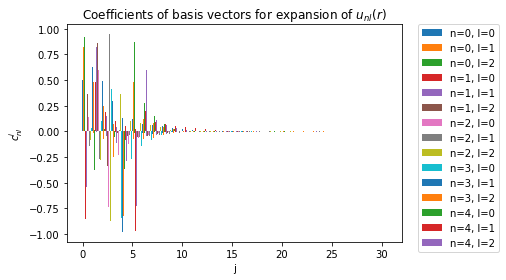

In [8]:
#Make bar chart of coefficients to get a feel for how important the higher-j basis vectors are

width = 0.1 
count=0
for n in range(0,Nmax):
    for l in range(0,Lmax):
        #First normalize the coefficients
        C0 = Coefficients[n,l] #un-normalized coefficients
        plt.bar(np.arange(Nb)+width*count, C0, width, label='n='+str(n)+', l='+str(l))
        count=count+1
        
plt.title('Coefficients of basis vectors for expansion of $u_{nl}(r)$')
plt.xlabel("j")
plt.ylabel('$c_{nl}^j$')  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show() 

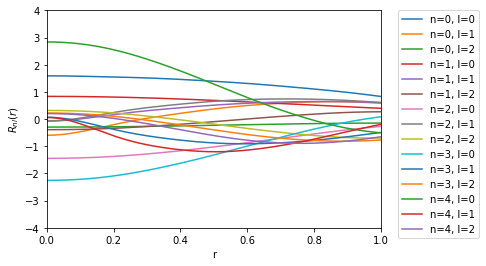

In [9]:
#initialize r values
npts = 1000
da = a/npts
Rarr = np.arange(da, a+da, da)

for n in range(0, Nmax):
    for l in range(0, Lmax):
        PsiArr = np.zeros(npts)
        Csum = 0
        Cj = Coefficients[n,l,:]
        for j in range(0, Nb):
            Csum = Csum + Coefficients[n,l,j]**2
        Cnorm = Cj/np.sqrt(Csum)
        for j in range(0, Nb):
            PsiArr = PsiArr + Cnorm[j]*Basis(j,Rarr)/Rarr
        plt.plot(Rarr,PsiArr,label='n='+str(n)+', l='+str(l))
        
plt.xlabel('r')
plt.ylabel('$R_{nl}(r)$')  
plt.axis([0,1,-4,4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show() 

Now let's make an __energy-level diagram__.  (_Feel free to make it prettier by changing the colors, line styles, etc._)  

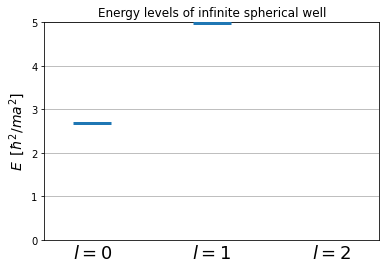

In [10]:
#Make list of first Nmax energies for l=0 to Lmax
Lmax = 2
Nmax = 3
EList = []
xList = []
for l in range(Lmax+1):
    for n in range(Nmax):
        EList.append(Energies[n,l])
        xList.append(l)

#Make list of strings to label states with the same l-value
orbitals = []
for l in range(Lmax+1):
    orbitals.append('$l=$'+str(l))
    
#Plot energies
fig, ax = plt.subplots()
ax.scatter(xList, EList, s=1444, marker="_", linewidth=3, zorder=3)

#Add horizontal grid lines and y-axis label
ax.grid(axis='y')
ax.set_ylabel('$E\\ \, [\hbar^2 / ma^2]$',size=14)
ax.set_ylim(bottom=0)

#Remove x-axis tick marks
ax.get_xaxis().set_visible(False)

#Add labels for angular momentum quantum numbers
for xi, yi, ti in zip(range(Lmax+1),np.zeros(Lmax+1),orbitals):
    ax.annotate(ti, xy=(xi,yi), xytext=(0,-4), size=18,
                ha="center", va="top", textcoords="offset points")
    
plt.title('Energy levels of infinite spherical well')
ax.margins(0.2)
if (V0<Inf):
    ax.set_ylim(top=V0)
plt.show()

# In-class follow-ups

__Explore the simulation:__

<div class="alert alert-success"><b>a)</b> With the matrix-element method you must choose the number of basis vectors N to employ.  The plots above provide two guides for choosing N: 

 1. increase N until the energies that you are interested in are stable to the desired number of significant digits

 2. increase N until the coefficients of the last few basis vectors for the wave functions that you are interested in are negligible
 
<b>Vary the number of basis vectors and study the behavior of the energies $E_{nl}$ and coefficients $c_{nl}^j$.</b></div>

* Does the number of basis vectors needed to obtain energies stable to three or four significant figures depend upon the principal quantum number $n$?  
* Upon the angular-momentum quantum number $l$?  
* What about the number of basis vectors needed to make the last few coefficients tiny?  
* Do these two approaches give you similar values for the appropriate number of basis vectors?  

_<span STYLE="color:red"><b>Don't worry about getting things "right" to beyond a few digits!</b></span>  The goal of this exercise is simply for you to gain intution for the effect of changing the number of basis vectors, and for how to choose a reasonable number of basis vectors._

__b)__ Once you are convinced that your numerical results are stable, compare them with the analytic solutions from __Griffiths Example 4.1__. A table with the first few zeros of $j_1(x)$ through $j_5(x)$ can be found in the Blackboard folder for this computational project. The first zero of $j_0(x)$ is $\pi$.

__c)__ Using your results for the coefficients $c_{nl}^j$, compute and plot the first three normalized radial wave functions $R_{nl}(r)$ for $l=0,1$, and 2.  Then describe their behavior _in words_.

<div class="alert alert-warning">
    <b>Validate your code with a less trivial example:</b>

* Determine the analytic expression for ground-state energy of the _finite_ spherical well in terms of $V_0$.  Then calculate the ground-state energy of the finite spherical well numerically for several values of $V_0$ between 5 and 50, and compare your results with the analytic solution. (_Make sure that your basis functions satisfy the new boundary conditions._)  
</div>

# Homework

<div class="alert alert-success">
1. Use the matrix-element method to calculate the energy-levels of the Hydrogen atom through the $4s$ state ($n=4$, $l=0$) to <b>three significant figures</b>.
    
a) Compare your results with the known analytic solutions.  

 * How many basis vectors are needed?  Does the number of basis vectors required depend upon the principal quantum number?  On the angular-momentum quantum number?

b) __Make an energy-level diagram for the states up to and including $E_{4s}$.__  Label the states using the quantum numbers $n$ and $l.  (_Be sure to show multiple states in cases of degeneracies._)
 
 
 * How many energy levels are below $E_{4s}$?

c) Calculate numerically the ground-state wave function and the expectation value of the radial position $\langle r \rangle$ in the ground state to four significant figures.  

 * What value _should_ you obtain?  Does your calculation agree with the theoretical value?
</div>

<div class="alert alert-info">
2. Use the matrix-element method to calculate the first 10 energy-levels of the Helium atom to <b>three significant figures</b>.
    
a) How many basis vectors are needed?  Do you need a greater or smaller number than to obtain a similar number of energies of the hydrogen atom?

b) Compare your numerical results with the [experimental He-atom energy levels](https://physics.nist.gov/PhysRefData/Handbook/Tables/heliumtable5.htm).  

c) Compare your results for the ground state and first-few excited states with the results from 1st-order perturbation theory given in __Townsend Section 12.2__.

d) Calculate numerically the ground-state wave function and the expectation value of the radial position $\langle r \rangle$ in the ground state to four significant figures.  

 * How does the value of $\langle r \rangle_{gs}$ for He compare with that for hydrogen, _and why?_
</div>

<div class="alert alert-warning">
3. Compare and constrast the shooting-method and matrix-element approches.  What are the advantages / disadvantages of each?  In what situations might you expect one or the other to be more accurate?
</div>